# Importing and Cleaning

In [1483]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from sklearn.preprocessing import power_transform

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [1362]:
hpy=pd.read_csv("happiness_score_dataset.csv")


In [1363]:
hpy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [1364]:
hpy.shape

(158, 12)

In [1365]:
print("There are {:,} rows ".format(hpy.shape[0]) + "and {} columns in our data".format(hpy.shape[1]))

There are 158 rows and 12 columns in our data


In [1366]:
hpy.set_index('Country', inplace=True)

In [1367]:
hpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [1368]:
hpy.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no NULL Values

In [1369]:
hpy.duplicated().sum()

0

There are no Duplicated values

In [1370]:
hpy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [1371]:
hpy.sort_values(by="Happiness Rank", ascending=True).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [1372]:
hpy.sort_values(by="Happiness Rank", ascending=False).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172


# Removing Outliers

In [1373]:
#bos.plot?

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

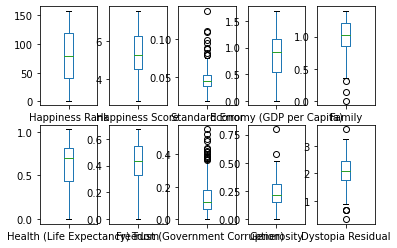

In [1374]:
hpy.plot.box(subplots=True,layout=(2,5))

outliers are present

In [1375]:
from scipy.stats import zscore
z=np.abs(zscore(hpy.iloc[:,3:-1]))
z

array([[0.80592569, 1.36962124, 1.32028142, ..., 1.57743784, 2.30965159,
        0.47103971],
       [0.05588945, 1.13522625, 1.51445776, ..., 1.33245589, 0.01647953,
        1.57585637],
       [0.8544869 , 1.19286069, 1.36105403, ..., 1.4696591 , 2.8427738 ,
        0.8242928 ],
       ...,
       [0.13253425, 0.45524543, 1.90108634, ..., 1.80923785, 0.38141902,
        1.85689094],
       [2.26396166, 2.06756644, 2.1184666 , ..., 2.06447176, 0.35771452,
        0.31694987],
       [1.13418227, 1.58633379, 3.13472485, ..., 0.42662099, 0.30180313,
        0.5581534 ]])

In [1376]:
hpy_new=hpy[(z<3).all(axis=1)]

In [1377]:
hpy.shape

(158, 11)

In [1378]:
hpy_new.shape

(150, 11)

In [1379]:
hpy=hpy_new


    outliers are removed

# Removing skewness

<AxesSubplot:>

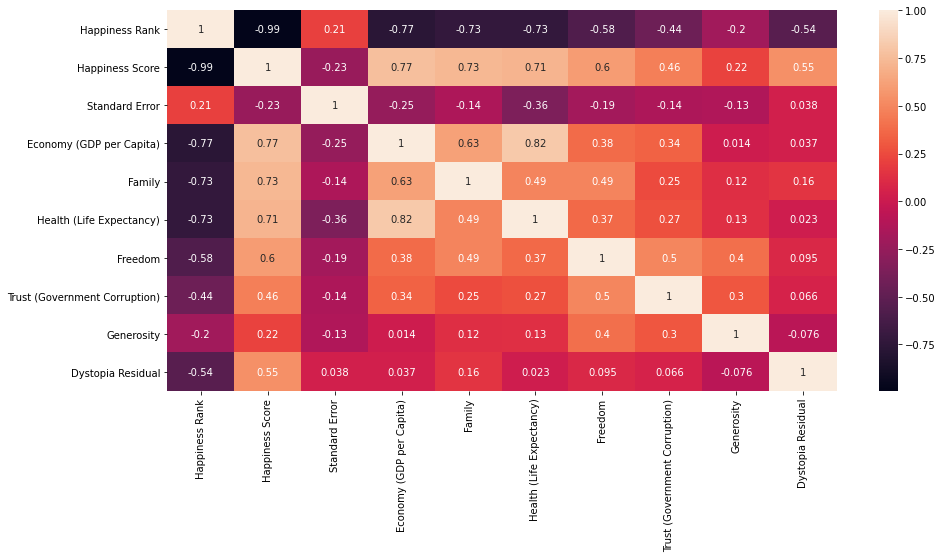

In [1380]:


plt.figure(figsize=(15,7))
sns.heatmap(hpy.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

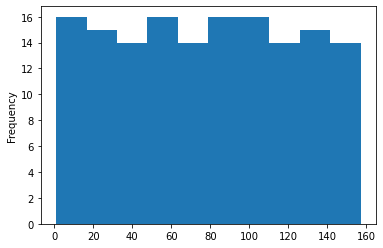

In [1381]:
hpy['Happiness Rank'].plot.hist()

In [1382]:

    print(skew(hpy['Happiness Rank']))

0.0035285241420091153


<AxesSubplot:ylabel='Frequency'>

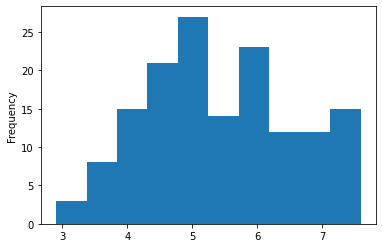

In [1383]:
hpy['Happiness Score'].plot.hist()

In [1384]:

    print(skew(hpy['Happiness Score']))

0.13674021188347132


<AxesSubplot:ylabel='Frequency'>

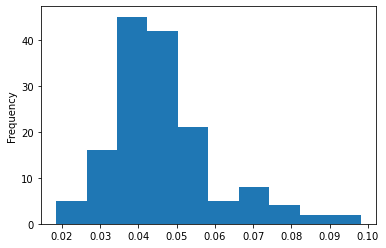

In [1385]:
hpy['Standard Error'].plot.hist()

In [1386]:
print(skew(hpy['Standard Error']))

1.2282028547811943


-0.03237849913989999


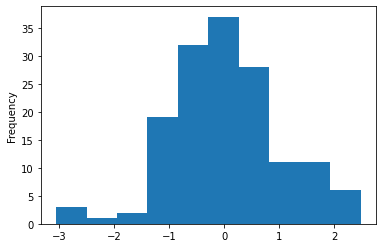

In [1387]:
hpy['Standard Error']=power_transform(hpy[['Standard Error']], method='yeo-johnson')
hpy['Standard Error'].plot.hist()
print(skew(hpy['Standard Error']))

<AxesSubplot:ylabel='Frequency'>

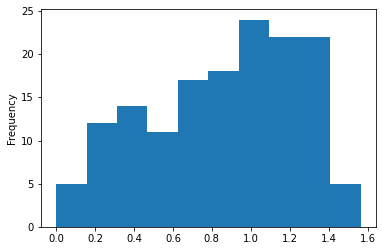

In [1388]:
hpy['Economy (GDP per Capita)'].plot.hist()

In [1389]:
    print(skew(hpy['Economy (GDP per Capita)']))

-0.37758199842810036


-0.13585818231868482


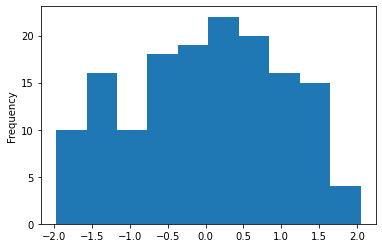

In [1390]:
hpy['Economy (GDP per Capita)']=power_transform(hpy[['Economy (GDP per Capita)']], method='yeo-johnson')
hpy['Economy (GDP per Capita)'].plot.hist()
print(skew(hpy['Economy (GDP per Capita)']))

<AxesSubplot:ylabel='Frequency'>

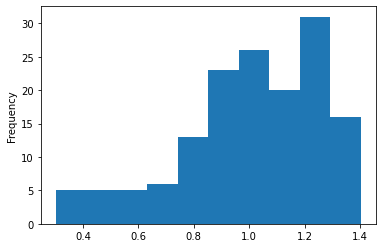

In [1391]:
hpy['Family'].plot.hist()

In [1392]:
    print(skew(hpy['Family']))

-0.7905970150344158


-0.15094620653642976


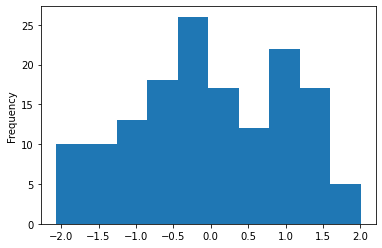

In [1393]:
hpy['Family']=power_transform(hpy[['Family']], method='yeo-johnson')
hpy['Family'].plot.hist()
print(skew(hpy['Family']))

<AxesSubplot:ylabel='Frequency'>

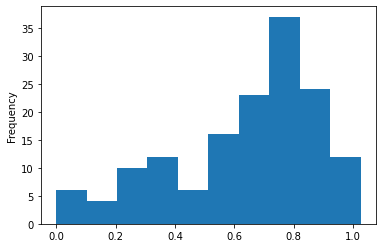

In [1394]:
hpy['Health (Life Expectancy)'].plot.hist()

In [1395]:
    print(skew(hpy['Health (Life Expectancy)']))

-0.7483388441107722


-0.188195711676988


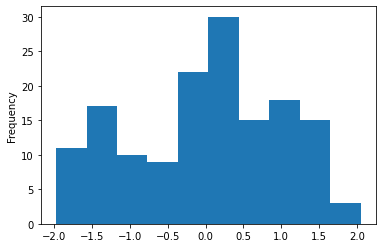

In [1396]:
hpy['Health (Life Expectancy)']=power_transform(hpy[['Health (Life Expectancy)']], method='yeo-johnson')
hpy['Health (Life Expectancy)'].plot.hist()
print(skew(hpy['Health (Life Expectancy)']))

<AxesSubplot:ylabel='Frequency'>

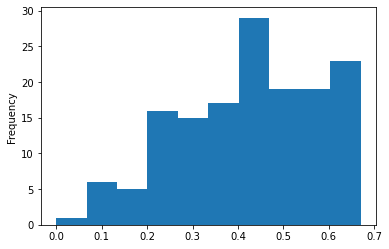

In [1397]:
hpy['Freedom'].plot.hist()


In [1398]:
    print(skew(hpy['Freedom']))

-0.3878772056395361


-0.07706651804357524


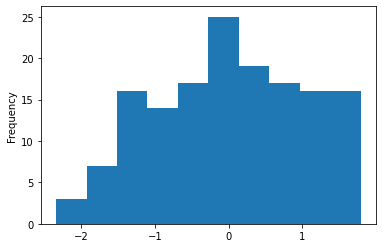

In [1399]:
hpy['Freedom']=power_transform(hpy[['Freedom']], method='yeo-johnson')
hpy['Freedom'].plot.hist()
print(skew(hpy['Freedom']))

<AxesSubplot:ylabel='Frequency'>

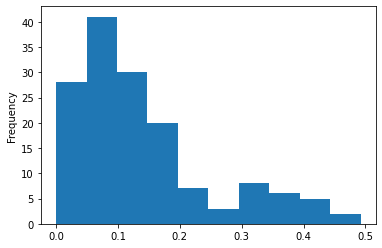

In [1400]:
hpy['Trust (Government Corruption)'].plot.hist()

In [1401]:
    print(skew(hpy['Trust (Government Corruption)']))

1.2534652352680626


0.16921701001835282


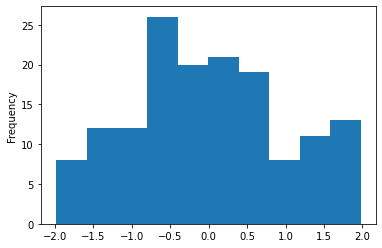

In [1402]:
hpy['Trust (Government Corruption)']=power_transform(hpy[['Trust (Government Corruption)']], method='yeo-johnson')
hpy['Trust (Government Corruption)'].plot.hist()
print(skew(hpy['Trust (Government Corruption)']))

<AxesSubplot:ylabel='Frequency'>

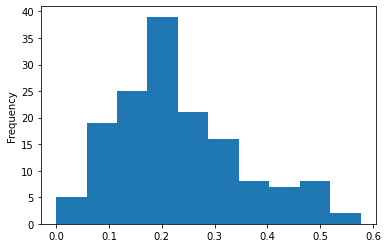

In [1403]:
hpy['Generosity'].plot.hist()

In [1404]:
    print(skew(hpy['Generosity']))

0.6376286718463812


0.026791105836055075


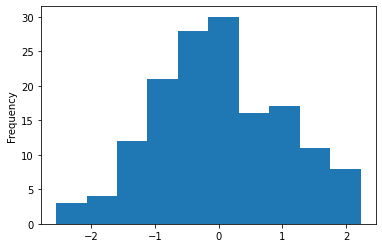

In [1405]:
hpy['Generosity']=power_transform(hpy[['Generosity']], method='yeo-johnson')
hpy['Generosity'].plot.hist()
print(skew(hpy['Generosity']))

<AxesSubplot:ylabel='Frequency'>

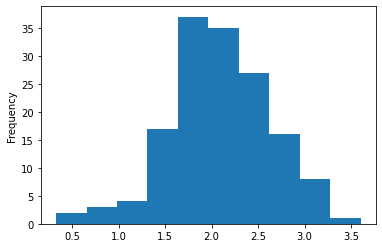

In [1406]:
hpy['Dystopia Residual'].plot.hist()

In [1407]:
    print(skew(hpy['Dystopia Residual']))

-0.19352614234175322


0.0325018253981517


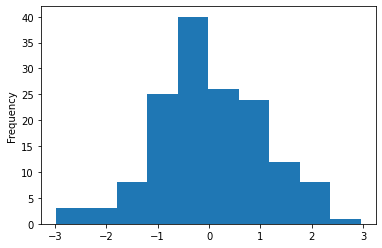

In [1408]:
hpy['Dystopia Residual']=power_transform(hpy[['Dystopia Residual']], method='yeo-johnson')
hpy['Dystopia Residual'].plot.hist()
print(skew(hpy['Dystopia Residual']))

skewness removed

# Indexing and grouping

In [1409]:
hpy_Region = hpy.groupby('Region')

In [1410]:
hpy_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(50)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,36.0,4.265528,0.574056,2.905,3.88325,4.3120,4.61575,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.5650,4.94400,5.253
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.2860,5.81300,6.505
Middle East and Northern Africa,19.0,5.343526,1.093456,3.006,4.70050,5.1920,6.12750,7.278
Southeastern Asia,8.0,5.443750,0.931334,3.819,5.02375,5.3795,5.94125,6.798
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.7290,5.98625,6.298
Latin America and Caribbean,20.0,6.165300,0.759083,4.518,5.86550,6.1995,6.69900,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.9370,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.2730,7.35000,7.427


In [1411]:
hpy[hpy["Region"]=="Sub-Saharan Africa"].head(50)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Mauritius,Sub-Saharan Africa,71,5.477,1.677193,0.325018,-0.249138,0.155006,0.897376,-0.515490,1.193268,-0.663902
Nigeria,Sub-Saharan Africa,78,5.268,-0.187647,-0.606483,-0.569559,-1.694860,-0.613922,-1.111552,0.456823,1.487460
Zambia,Sub-Saharan Africa,85,5.129,1.588192,-1.039234,-0.524896,-1.368405,0.355811,0.140024,-0.195999,0.974460
Somaliland region,Sub-Saharan Africa,91,5.057,1.186509,-1.629336,-0.386682,-0.952264,0.195710,1.767425,1.890424,-0.026847
Mozambique,Sub-Saharan Africa,94,4.971,1.943303,-1.826328,-0.073399,-1.827025,-0.632239,0.467377,0.045844,1.806513
Lesotho,Sub-Saharan Africa,97,4.898,2.390298,-1.247996,-0.007928,-1.853826,-0.770216,0.144128,-0.505995,1.298128
Swaziland,Sub-Saharan Africa,101,4.867,2.209372,-0.463225,0.137189,-1.854625,-0.836331,-1.301517,-0.322051,0.687380
South Africa,Sub-Saharan Africa,113,4.642,0.144323,0.083302,0.693772,-1.426523,-0.683102,-0.315197,-0.974706,-0.738693
Ghana,Sub-Saharan Africa,114,4.633,0.267878,-0.866787,-1.295480,-1.073281,-0.096682,-1.050454,0.116783,0.347137


In [1412]:
hpy_ssa = hpy[hpy['Region'] == 'Sub-Saharan Africa']
hpy_sa = hpy[hpy['Region'] == 'Southern Asia']
hpy_cee = hpy[hpy['Region'] == 'Central and Eastern Europe']
hpy_mena = hpy[hpy['Region'] == 'Middle East and Northern Africa']
hpy_sea = hpy[hpy['Region'] == 'Southeastern Asia']
hpy_ea = hpy[hpy['Region'] == 'Eastern Asia']
hpy_lac = hpy[hpy['Region'] == 'Latin America and Caribbean']
hpy_we = hpy[hpy['Region'] == 'Western Europe']
hpy_na = hpy[hpy['Region'] == 'North America']
hpy_anz = hpy[hpy['Region'] == 'Australia and New Zealand']

In [1413]:
len(hpy_ssa[hpy_ssa['Happiness Score'] > 6])

0

In [1414]:
print("There are {} countries in Sub-Saharan Africa that have a happiness score above 6.0 ".format(len(hpy_ssa[hpy_ssa['Happiness Score'] > 6])))

There are 0 countries in Sub-Saharan Africa that have a happiness score above 6.0 


In [1415]:
len(hpy_sa[hpy_sa['Happiness Score'] > 6])

0

In [1416]:
print("There are {} countries in Southern Asia that have a happiness score above 6.0 ".format(len(hpy_sa[hpy_sa['Happiness Score'] > 6])))

There are 0 countries in Southern Asia that have a happiness score above 6.0 


In [1417]:
len(hpy_cee[hpy_cee['Happiness Score'] > 6])

2

In [1418]:
print("There are {} countries in Central and Eastern Europe that have a happiness score above 6.0 ".format(len(hpy_cee[hpy_cee['Happiness Score'] > 6])))

There are 2 countries in Central and Eastern Europe that have a happiness score above 6.0 


In [1419]:
len(hpy_mena[hpy_mena['Happiness Score'] > 6])

5

In [1420]:
print("There are {} countries in Middle East and Northern Africa that have a happiness score above 6.0 ".format(len(hpy_mena[hpy_mena['Happiness Score'] > 6])))

There are 5 countries in Middle East and Northern Africa that have a happiness score above 6.0 


In [1421]:
len(hpy_sea[hpy_sea['Happiness Score'] > 6])

2

In [1422]:
print("There are {} countries in Southeastern Asia that have a happiness score above 6.0 ".format(len(hpy_sea[hpy_sea['Happiness Score'] > 6])))


There are 2 countries in Southeastern Asia that have a happiness score above 6.0 


In [1423]:
len(hpy_ea[hpy_ea['Happiness Score'] > 6])

1

In [1424]:
print("There are {} countries in Eastern Asia that have a happiness score above 6.0 ".format(len(hpy_ea[hpy_ea['Happiness Score'] > 6])))


There are 1 countries in Eastern Asia that have a happiness score above 6.0 


In [1425]:
len(hpy_lac[hpy_lac['Happiness Score'] > 6])

12

In [1426]:
print("There are {} countries in Latin America and Caribbean that have a happiness score above 6.0 ".format(len(hpy_lac[hpy_lac['Happiness Score'] > 6])))

There are 12 countries in Latin America and Caribbean that have a happiness score above 6.0 


In [1427]:
len(hpy_we[hpy_we['Happiness Score'] > 6])

16

In [1428]:

print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(hpy_we[hpy_we['Happiness Score'] > 6])))

There are 16 countries in Western Europe that have a happiness score above 6.0 


In [1429]:
len(hpy_na[hpy_na['Happiness Score'] > 6])

2

In [1430]:
print("There are {} countries in North America that have a happiness score above 6.0 ".format(len(hpy_na[hpy_na['Happiness Score'] > 6])))

There are 2 countries in North America that have a happiness score above 6.0 


In [1431]:
len(hpy_anz[hpy_anz['Happiness Score'] > 6])

2

In [1432]:
print("There are {} countries in Australia and New Zealand that have a happiness score above 6.0 ".format(len(hpy_anz[hpy_anz['Happiness Score'] > 6])))

There are 2 countries in Australia and New Zealand that have a happiness score above 6.0 


In [1433]:
d_ssa=hpy_ssa.max(axis=0)['Happiness Score'] - hpy_ssa.min(axis=0)['Happiness Score']
d_ssa

2.5720000000000005

In [1434]:
d_sa=hpy_sa.max(axis=0)['Happiness Score'] - hpy_sa.min(axis=0)['Happiness Score']
d_sa

1.677999999999999

In [1435]:
d_cee=hpy_cee.max(axis=0)['Happiness Score'] - hpy_cee.min(axis=0)['Happiness Score']
d_cee


2.287

In [1436]:
d_mena=hpy_mena.max(axis=0)['Happiness Score'] - hpy_mena.min(axis=0)['Happiness Score']
d_mena

4.271999999999999

In [1437]:
d_sea=hpy_sea.max(axis=0)['Happiness Score'] - hpy_sea.min(axis=0)['Happiness Score']
d_sea

2.978999999999999

In [1438]:
d_ea=hpy_ea.max(axis=0)['Happiness Score'] - hpy_ea.min(axis=0)['Happiness Score']
d_ea


1.4239999999999995

In [1439]:
d_lac=hpy_lac.max(axis=0)['Happiness Score'] - hpy_lac.min(axis=0)['Happiness Score']
d_lac

2.708

In [1440]:
d_we=hpy_we.max(axis=0)['Happiness Score'] - hpy_we.min(axis=0)['Happiness Score']
d_we


2.7300000000000004

In [1441]:
d_na=hpy_na.max(axis=0)['Happiness Score'] - hpy_na.min(axis=0)['Happiness Score']
d_na

0.3080000000000007

In [1442]:
d_anz=hpy_anz.max(axis=0)['Happiness Score'] - hpy_anz.min(axis=0)['Happiness Score']
d_anz

0.002000000000000668

In [1443]:
deltas = {}

In [1444]:
deltas["Sub-Saharan Africa"] = d_ssa
deltas["Southern Asia"] = d_sa
deltas["Central and Eastern Europe"] = d_cee
deltas["Middle East and Northern Africa"] = d_mena
deltas["Southeastern Asia"] = d_sea
deltas["Eastern Asia"] = d_ea
deltas["Latin America and Caribbean"] = d_lac
deltas["Western Europe"] = d_we
deltas["North America"] = d_na
deltas["Australia and New Zealand"] = d_anz

In [1445]:
print("The {} region seems to have the largest range of happiness scores".format(max(deltas, key=deltas.get)))

The Middle East and Northern Africa region seems to have the largest range of happiness scores


# Bar plot of the Happiness Score

Text(0.5, 1.0, 'Happiness Score of the top 5 Countries')

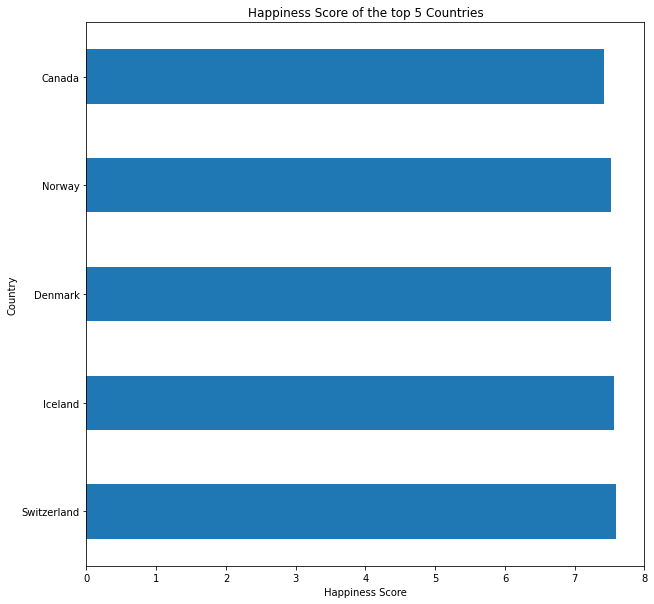

In [1446]:
hpy['Happiness Score'].head().plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 5 Countries')

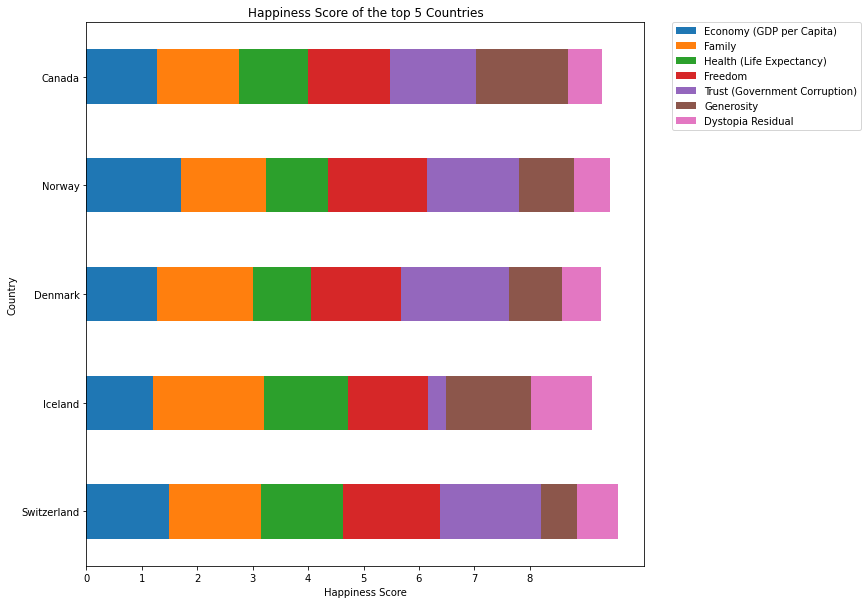

In [1447]:
hpy[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].head().plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 5 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

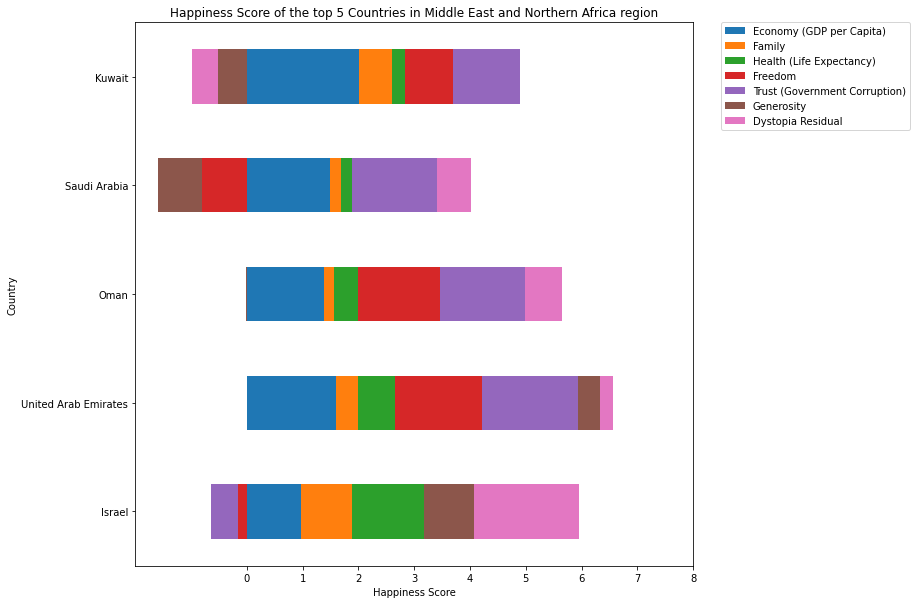

In [1482]:
hpy_mena[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].head().plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 5 Countries in Middle East and Northern Africa region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Pairwise Scatter plots

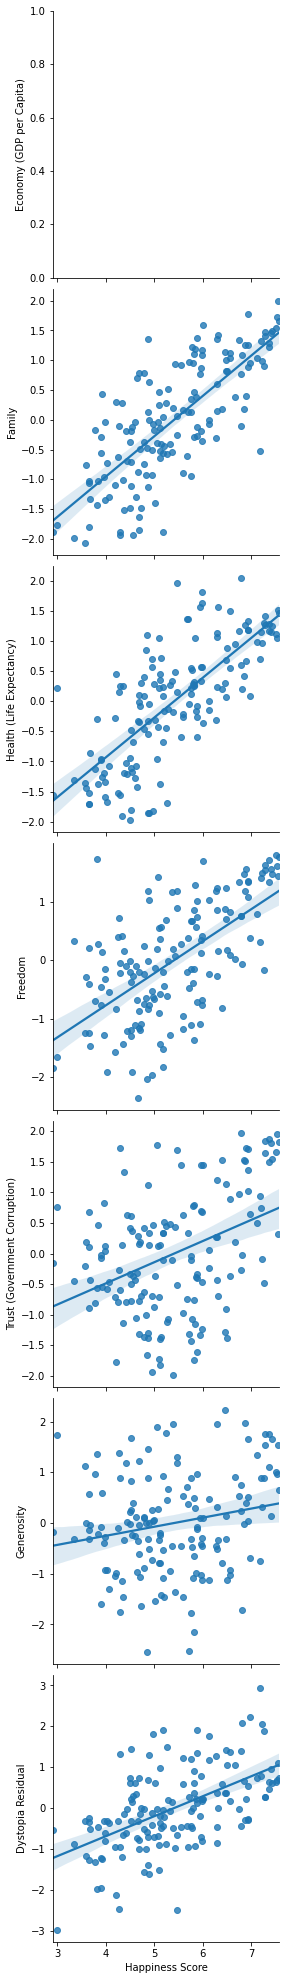

In [1449]:
sns.pairplot(data=hpy, kind='reg', size = 4,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

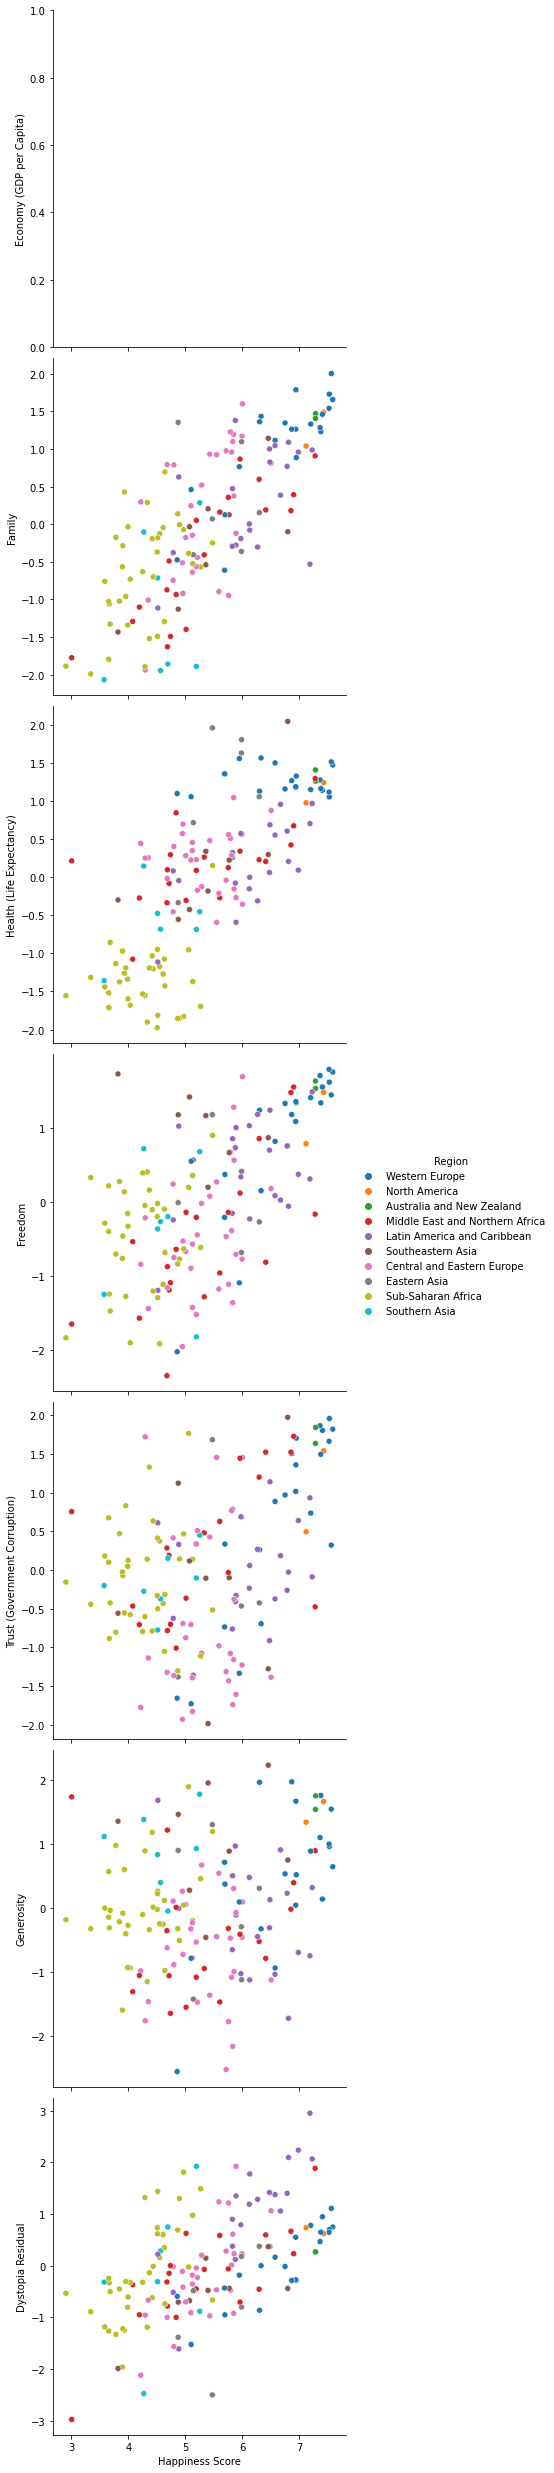

In [1450]:
sns.pairplot(data=hpy, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

# Correlation

In [1451]:
hpy.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.776888
Family                           0.759381
Health (Life Expectancy)         0.741547
Freedom                          0.612842
Dystopia Residual                0.547650
Trust (Government Corruption)    0.387637
Generosity                       0.200467
Standard Error                  -0.242456
Happiness Rank                  -0.992503
Name: Happiness Score, dtype: float64

Happiness Score has highest correlation with Economy (GDP per Capita)

In [1452]:
hpy.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Happiness Rank                   0.992503
Economy (GDP per Capita)         0.776888
Family                           0.759381
Health (Life Expectancy)         0.741547
Freedom                          0.612842
Dystopia Residual                0.547650
Trust (Government Corruption)    0.387637
Standard Error                   0.242456
Generosity                       0.200467
Name: Happiness Score, dtype: float64

Happiness Score has highest correlation with Economy (GDP per Capita)

In [1453]:
hpy.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992503,0.225466,-0.778015,-0.755514,-0.749755,-0.596251,-0.364854,-0.182046,-0.539933
Happiness Score,-0.992503,1.000000,-0.242456,0.776888,0.759381,0.741547,0.612842,0.387637,0.200467,0.547650
Standard Error,0.225466,-0.242456,1.000000,-0.243912,-0.190353,-0.319370,-0.217135,-0.107425,-0.130438,0.008333
Economy (GDP per Capita),-0.778015,0.776888,-0.243912,1.000000,0.650297,0.841933,0.412947,0.269698,0.001045,0.041325
Family,-0.755514,0.759381,-0.190353,0.650297,1.000000,0.557728,0.541681,0.225295,0.154234,0.167973
Health (Life Expectancy),-0.749755,0.741547,-0.319370,0.841933,0.557728,1.000000,0.418207,0.201277,0.122306,0.037866
Freedom,-0.596251,0.612842,-0.217135,0.412947,0.541681,0.418207,1.000000,0.496279,0.419723,0.095612
Trust (Government Corruption),-0.364854,0.387637,-0.107425,0.269698,0.225295,0.201277,0.496279,1.000000,0.271053,0.083117
Generosity,-0.182046,0.200467,-0.130438,0.001045,0.154234,0.122306,0.419723,0.271053,1.000000,-0.053678
Dystopia Residual,-0.539933,0.547650,0.008333,0.041325,0.167973,0.037866,0.095612,0.083117,-0.053678,1.000000


<AxesSubplot:>

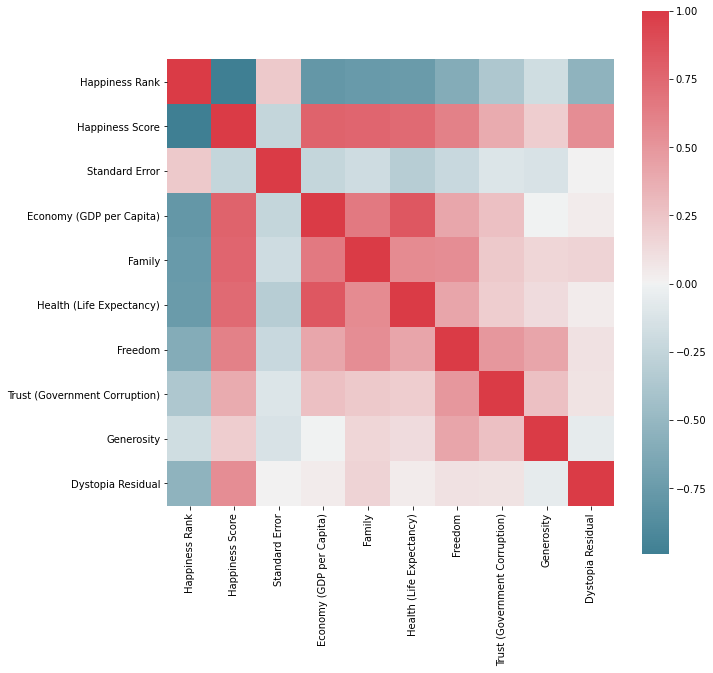

In [1454]:
corr = hpy.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [1455]:
hpy.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,-0.955872,1.496510,1.655648,1.475144,1.752366,1.821002,0.643176,0.746637
Iceland,Western Europe,2,7.561,0.375437,1.199139,2.001641,1.517110,1.442860,0.322424,1.540959,1.107506
Denmark,Western Europe,3,7.527,-1.046999,1.271461,1.726698,1.056051,1.614911,1.959024,0.958881,0.697586
Norway,Western Europe,4,7.522,-0.476127,1.698523,1.538407,1.120195,1.788013,1.665595,0.996449,0.645970
Canada,North America,5,7.427,-0.804436,1.274000,1.486485,1.246418,1.477656,1.541009,1.659879,0.619855


# splitting data for training and testing

In [1456]:
x=hpy.iloc[:,4:-1]
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,
Switzerland,1.496510,1.655648,1.475144,1.752366,1.821002,0.643176
Iceland,1.199139,2.001641,1.517110,1.442860,0.322424,1.540959
Denmark,1.271461,1.726698,1.056051,1.614911,1.959024,0.958881
Norway,1.698523,1.538407,1.120195,1.788013,1.665595,0.996449
Canada,1.274000,1.486485,1.246418,1.477656,1.541009,1.659879
...,...,...,...,...,...,...
Burkina Faso,-1.491984,-0.759759,-1.440802,-0.285899,0.181129,-0.000126
Afghanistan,-1.365633,-2.066683,-1.357475,-1.247610,-0.200354,1.114991
Benin,-1.434102,-1.989442,-1.314868,0.328668,-0.441727,-0.321955


In [1457]:
y=hpy['Happiness Score']
y.head()

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
Name: Happiness Score, dtype: float64

In [1458]:
x.shape

(150, 6)

In [1459]:
y.shape

(150,)

In [1460]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.39,random_state=33)

In [1461]:
x_train.shape

(91, 6)

In [1462]:
y_train.shape

(91,)

In [1463]:
x_test.shape

(59, 6)

In [1464]:
y_test.shape

(59,)

In [1465]:
lm=LinearRegression()

In [1466]:
lm.fit(x_train,y_train)

LinearRegression()

In [1467]:
lm.coef_

array([0.20872387, 0.40862247, 0.32399301, 0.15254661, 0.1267958 ,
       0.0042115 ])

In [1468]:
lm.intercept_

5.426327287616806

In [1469]:
lm.score(x_train,y_train)

0.7437535461332592

In [1470]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score",y_test)

predicted result score: [5.66355029 4.64261422 6.06148166 5.79840252 4.23919951 5.72463203
 6.12078224 7.19654455 4.85440714 4.63736383 3.80994688 5.47481654
 4.65227466 5.68523343 3.99651865 4.28521433 4.27764139 6.83595255
 6.02680039 3.66444827 7.19078009 6.87614554 4.88455541 6.92788633
 4.42376652 5.48159062 5.0993244  5.34100585 3.88082941 3.44606881
 5.87017925 5.40719904 4.38060339 4.09318044 4.48285538 4.31700287
 5.02693045 4.95552886 4.46062437 6.65740359 4.88163048 4.82974637
 4.49085156 7.23821574 6.97566271 5.21673626 6.39747514 4.14407492
 5.2933806  6.34385187 5.36016144 4.56280674 7.10192215 5.95712345
 4.20555772 4.28262536 5.24983039 5.20401046 6.44514406]
actual score Country
Mongolia                   4.874
Kosovo                     5.589
Czech Republic             6.505
Nicaragua                  5.828
Comoros                    3.956
Hungary                    4.800
Panama                     6.786
Ireland                    6.940
Gabon                      3.89

In [1471]:
print('error:')

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))



error:
mean absolute error: 0.3930194097880221
mean squared error: 0.24720021711471646
Root mean squared error: 0.4971923341270624


# checking results with R2score

In [1472]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8212814877353626


this model is 82% accurate


# saving and testing model

In [1473]:
import joblib
joblib.dump(pred,"hpyy.pkl")

['hpyy.pkl']

In [1474]:
tst=joblib.load("hpyy.pkl")

In [1475]:
pred=lm.predict(x)

In [1476]:
if y.all()==pred.all():
    print("yes")

yes
